# Panel 3

### `import packages.needed`

In [1]:
%matplotlib inline
#
from lrgsglib.core import *
#
move_to_rootf()
plt.style.use('ipynb/nb_plotsheet.mplstyle')
#
datpath = os.path.join('data')
subdatapath = os.path.join('plot', 'paper', 'panel_3/')
Isingdatapath = os.path.join(datpath, subdatapath, 'Ising')

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


## subfig01:

In [16]:
side = 64
geo = 'squared'
pflip = 0.22
T_ising = .2
navg = 2
eqSTEP = 10
gsN = 2
#
IMPORT = False

In [17]:
args = {'import_on': True} if IMPORT else {}
l = Lattice2D(side1=side, sgpath=Isingdatapath, geo=geo, pflip=pflip, init_nw_dict=True, **args)
# l.flip_random_fract_edges()
l.flip_sel_edges(l.nwDict['randXERR']['G'])
l.compute_k_eigvV(howmany=10)
ising_dyn = IsingDynamics(sg=l, T=T_ising, 
                          nstepsIsing=1000, 
                          ic=f"ground_state_{gsN}",
                          runlang="C2")
ising_dyn.init_ising_dynamics()
if not l.import_on:
    # l.export_graph()
    l.export_edgel_bin()

check_init


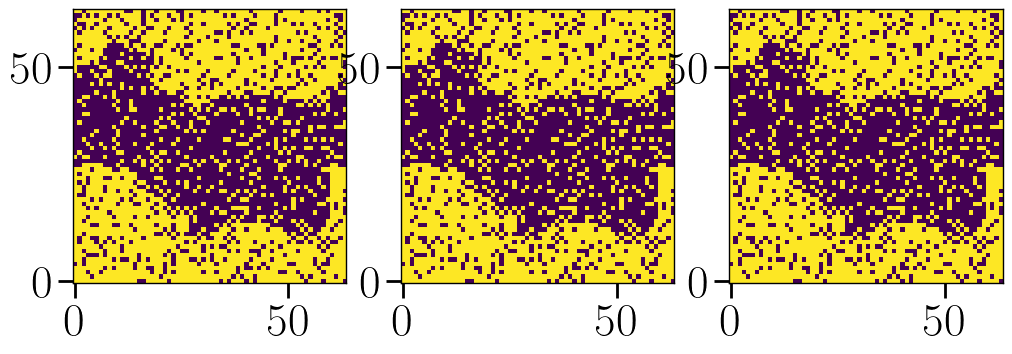

In [18]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 6))
s_imshow = flip_to_positive_majority_adapted(ising_dyn.s.reshape(l.syshape))
eigv_show = flip_to_positive_majority_adapted(
    np.sign(l.eigV[gsN].reshape(l.syshape)))
init_show = flip_to_positive_majority_adapted(
    np.fromfile(os.path.join(l.isingpath, f"s_sqr_p={pflip:.3g}.bin"), 
                dtype="int8").reshape(l.syshape)
)
ax[0].imshow(s_imshow, interpolation='none')
ax[1].imshow(eigv_show, interpolation='none')
ax[2].imshow(init_show, interpolation='none')
print("check_init")

In [19]:
ising_dyn.run()

['src/lrgsglib/Ccore/bin/IsingSimulator2', '4096', '0.2', '0.22', 'sqr_p=0.22', '1', '2', '10', 'data/data/plot/paper/panel_3/Ising/l2d_squared/', 'LedjDFnEj2', 'asynchronous', '10']


0.941162109375 0.92626953125 0.927437641723356


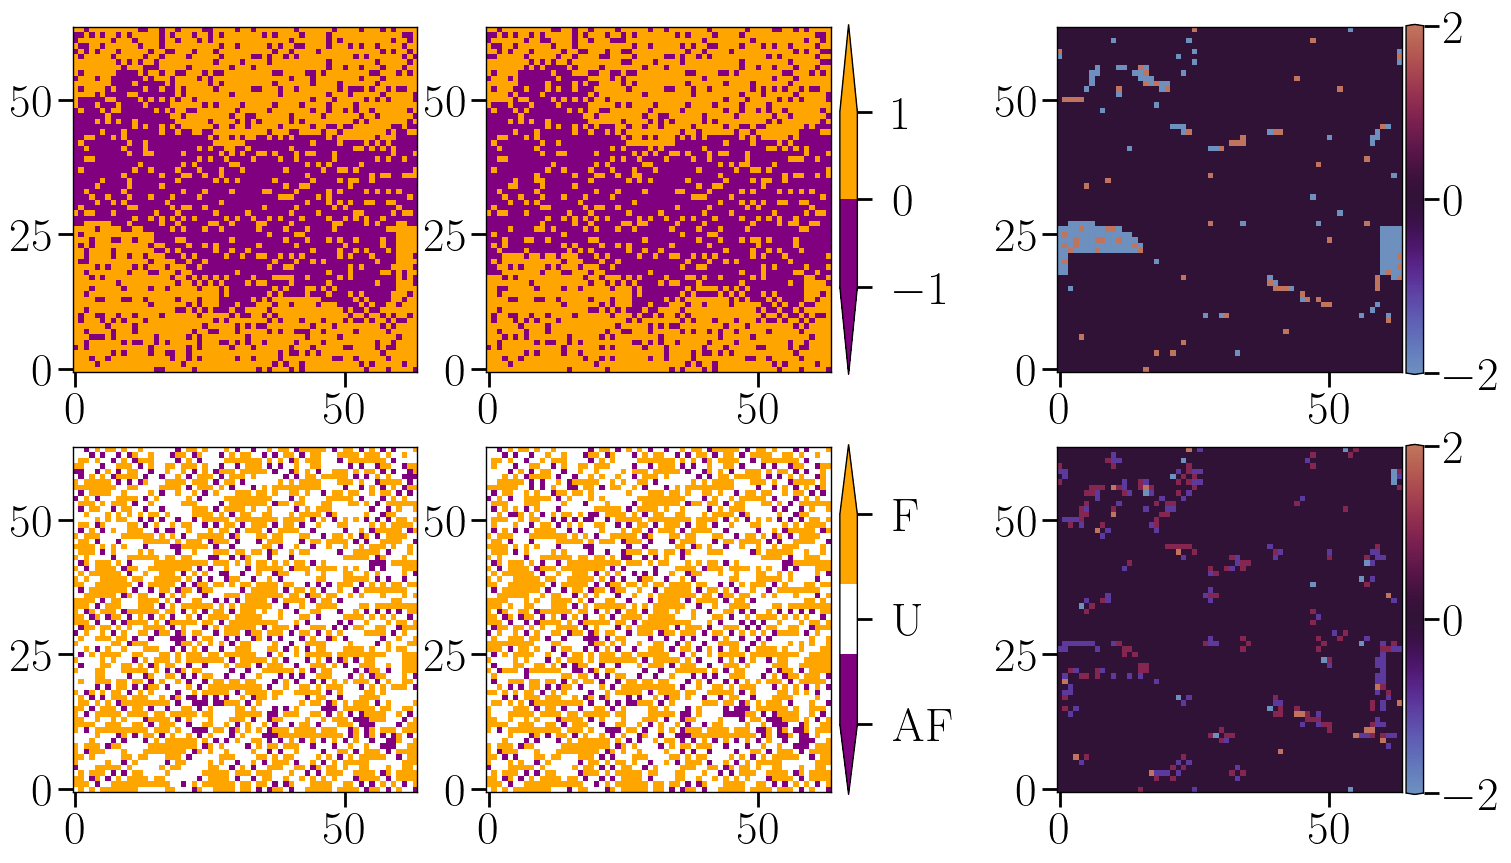

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
#
path = os.path.join(l.isingpath, f"s_sqr_p={pflip:.3g}.bin")
initFrame = flip_to_positive_majority_adapted(
    np.sign(l.eigV[gsN].reshape(l.syshape)))#np.fromfile(path, dtype="int8").reshape(*l.syshape)
codestr = ising_dyn.id_string_isingdyn
basename = f"sOut_sqr_p={pflip:.3g}_T={T_ising:.3g}_{codestr}.bin"
path = os.path.join(l.isingpath, basename)
lastFrame = flip_to_positive_majority_adapted(ising_dyn.s.reshape(*l.syshape))
c = flip_to_positive_majority_adapted(np.sign(l.eigV[1].reshape(l.syshape)))
#
l.load_vec_on_nodes(initFrame.flatten(), attr='sI')
l.load_vec_on_nodes(lastFrame.flatten(), attr='sF')
ferroGroup, antiGroup = l.classify_ferroAntiferro_regions(attr_str='sI')
sI = np.zeros(l.syshape)
sI[np.unravel_index(ferroGroup, l.syshape)] = 1
antiGroup = np.array(antiGroup, dtype=np.intp)
sI[np.unravel_index(antiGroup, l.syshape)] = -1
ferroGroup, antiGroup = l.classify_ferroAntiferro_regions(attr_str='sF')
sF = np.zeros(l.syshape)
sF[np.unravel_index(ferroGroup, l.syshape)] = 1
antiGroup = np.array(antiGroup, dtype=np.intp)
sF[np.unravel_index(antiGroup, l.syshape)] = -1
#
cmap = ListedColormap(['purple', 'orange'])
cmap2 = ListedColormap(['purple', 'white', 'orange'])
diff_cmap = restr_twilight
norm = Normalize(vmin=-1, vmax=1)  

kwargsImshow = {'interpolation': 'none', 'cmap': cmap}
kwargsImshow2 = {'interpolation': 'none', 'cmap': cmap2}
kwargsImshowd = {'interpolation': 'none', 'cmap': diff_cmap}
ax[0][0].imshow(initFrame, **kwargsImshow)
ax[0][1].imshow(lastFrame, **kwargsImshow)
ax[0][2].imshow(lastFrame-initFrame, **kwargsImshowd)
ax[1][0].imshow(sI, **kwargsImshow2)
im = ax[1][1].imshow(sF, **kwargsImshow2)
ax[1][2].imshow(sI-sF, **kwargsImshowd)
#
# Create a mask where elements are equal and different from zero in both arrays
mask = (sI == sF) & (sI != 0)
# Count the number of positions where the mask is True
count_equal_nonzero = np.sum(mask)
# Calculate the total number of elements (excluding zero elements in sI)
total_nonzero = np.sum(sI != 0)
# Calculate the ratio
ratio = count_equal_nonzero / total_nonzero
overlapTot = np.sum(initFrame==lastFrame) / l.N
overlapAF = np.sum(sI==sF) / l.N
print(overlapTot, overlapAF, ratio)

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap2), 
                    ax=ax[1][:-1].ravel().tolist(), extendfrac='auto', pad=0.01,
                    orientation='vertical', extend='both')
cbar.set_ticks([-1, 0, 1])
cbar.ax.tick_params(axis='y', pad=15)
cbar.set_ticklabels(['AF', 'U', 'F'])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), 
                    ax=ax[0][:-1].ravel().tolist(), extendfrac='auto', pad=0.01,
                    orientation='vertical', extend='both')
cbar.set_ticks([-1, 0, 1])
cbar.ax.tick_params(axis='y', pad=15)
norm = Normalize(vmin=np.min(lastFrame-initFrame), vmax=np.max(lastFrame-initFrame)) 
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=diff_cmap), 
                    ax=ax[0][-1], extendfrac='auto', pad=0.01,
                    orientation='vertical', extend='both')
norm = Normalize(vmin=np.min(sI-sF), vmax=np.max(sI-sF)) 
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=diff_cmap), 
                    ax=ax[1][-1], extendfrac='auto', pad=0.01,
                    orientation='vertical', extend='both')
# divider = make_axes_locatable(ax[1][1])
# cax = divider.append_axes("right", size="5%", pad=0.05)
# cbar = fig.colorbar(im, cax=cax)

In [7]:
path = os.path.join(l.isingpath, f"ene_sqr_p={pflip:.3g}_T={T_ising:.3g}_{ising_dyn.id_string_isingdyn}.bin")
ene = np.fromfile(path, dtype="float")
path = os.path.join(l.isingpath, f"magn_sqr_p={pflip:.3g}_T={T_ising:.3g}_{ising_dyn.id_string_isingdyn}.bin")
magn = np.fromfile(path, dtype="float")

- anneal and quench energy to prove paramagnetic effects (with T)
- minfty
- - magnetizzatione abs

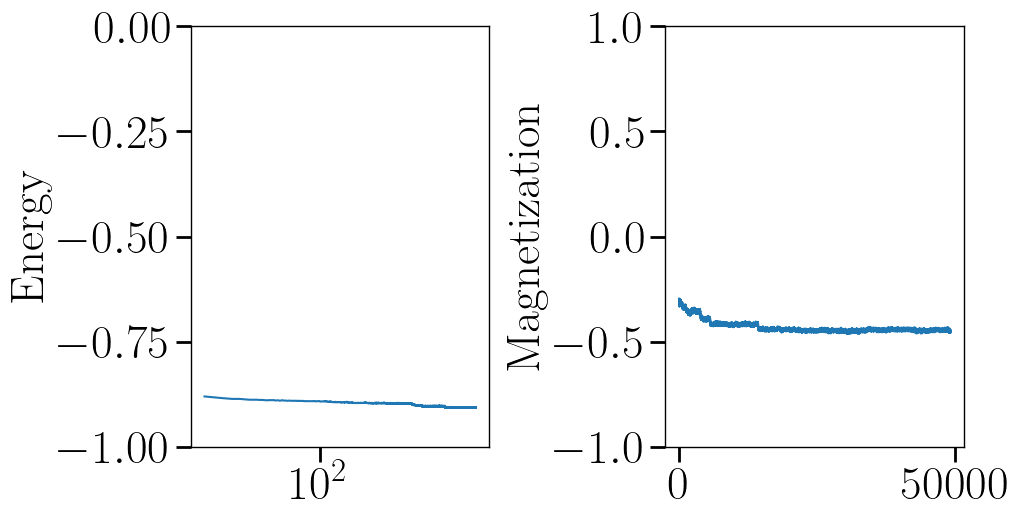

In [15]:
x = np.arange(0, ene.size)+1
fig, ax = plt.subplots(ncols=2, figsize=(10, 6))
fig.tight_layout() 
ax[0].plot(x, ene/4, '-', label='Energy')
ax[1].plot(x, magn, '-', label='Magn')
ax[0].set_xscale('log')
ax[0].set_ylabel('Energy')
ax[1].set_ylabel('Magnetization')
ax[0].set_ybound(-1, 0)
ax[1].set_ybound(-1, 1)
plt.show()

## Phase Diagram

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.rcParams.update({'text.usetex': True})
# Constants
J = 1  # Interaction strength (arbitrary units)
k_B = 1  # Boltzmann constant (arbitrary units)
T = np.linspace(1e-2, 5, 500)
p = 0.5 * (1 + np.exp(J / (k_B * T)))**-1
# Plotting
ax.plot(p, T, lw=2, ls='--', marker='', label='Nishimori Line', color='k')
# Labels and title
ax.set_ylim(0, 3)
plt.xlim(-.005, .5)
ax.set_xticks([0, 0.103, 0.5])
ax.set_xticklabels([r"0", r"\(p_{\mathrm{c}}\)", r"0.5"])
ax.tick_params(axis='both', which='both', labelsize=30)
ax.set_yticks([0, 2.2])
ax.set_yticklabels([r"0", r"\(T_{\mathrm{c}}\)"])
# ax.spines.bottom.set_bounds(p.min(), .5)
# ax.spines.left.set_bounds(T.min(), 3)
# ax.spines.top.set_bounds(p.min(), .45)
# ax.spines.right.set_visible(False)
# ax.spines.top.set_visible(False)
fig.savefig(os.path.join(datpath, subdatapath, 'phase_diagram.pdf'), 
            bbox_inches='tight', transparent=True)
plt.show()